
Top 5 Trending Stocks:
RACE
AMSC
SCHD
VGT
BBD
Ticker Name: AAPL
Full Name: Apple Inc.
Current Market Price: 227.79
Target Mean Price: 222.0918
52 Week High: 237.23
52 Week Low: 164.08
Stock data saved to stock_data.csv


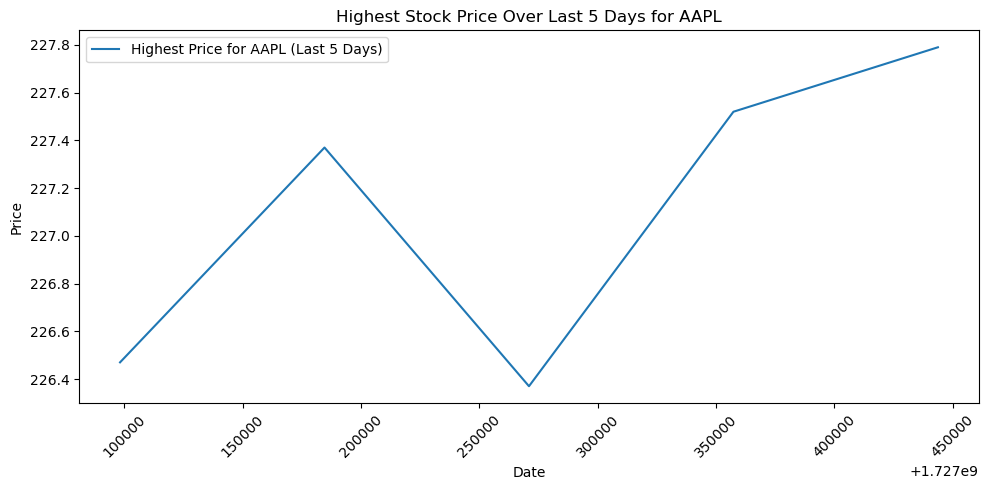

In [14]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import json
# Function to fetch stock data from Yahoo Finance API
def fetch_stock_data(ticker, apikey):
    url = "https://yfapi.net/v6/finance/quote"
    querystring = {"symbols": ticker}
    headers = {
        'x-api-key': apikey
    }
    
    try:
        response = requests.get(url, headers=headers, params=querystring)
        response.raise_for_status()  # Raise an exception for HTTP errors
        stock_json = response.json()
        return stock_json['quoteResponse']['result'][0]
    except requests.exceptions.HTTPError as http_err:
        print(f"HTTP error occurred: {http_err}")
    except Exception as err:
        print(f"Other error occurred: {err}")
    return None

# Function to fetch trending stocks from Yahoo Finance API
def fetch_trending_stocks(apikey):
    url = "https://yfapi.net/v1/finance/trending/US"
    headers = {
        'x-api-key': apikey
    }
    
    try:
        response = requests.get(url, headers=headers)
        response.raise_for_status()  # Raise an exception for HTTP errors
        trending_json = response.json()
        return trending_json['finance']['result'][0]['quotes']
    except requests.exceptions.HTTPError as http_err:
        print(f"HTTP error occurred: {http_err}")
    except Exception as err:
        print(f"Other error occurred: {err}")
    return None

# Function to display stock information
def display_stock_info(stock_data):
    if stock_data:
        print(f"Ticker Name: {stock_data['symbol']}")
        print(f"Full Name: {stock_data['longName']}")
        print(f"Current Market Price: {stock_data['regularMarketPrice']}")
        print(f"Target Mean Price: {stock_data.get('fiftyDayAverage')}")
        print(f"52 Week High: {stock_data['fiftyTwoWeekHigh']}")
        print(f"52 Week Low: {stock_data['fiftyTwoWeekLow']}")
    else:
        print("Stock data not available.")

# Function to save stock data to CSV
def save_to_csv(data, file_name='stock_data.csv'):
    df = pd.DataFrame([data])
    df.to_csv(file_name, index=False)
    print(f"Stock data saved to {file_name}")

# Bonus: Function to plot historical price data
def plot_historical_prices(ticker, apikey):
    url = f"https://yfapi.net/v8/finance/spark"
    querystring = {"symbols": ticker, "range": "5d", "interval": "1d"}
    headers = {
        'x-api-key': apikey
    }

    try:
        response = requests.get(url, headers=headers, params=querystring)
        response.raise_for_status()
        data = response.json()
        dates = data[ticker]['timestamp']
        highs = data[ticker]['close']
        
        plt.figure(figsize=(10, 5))
        plt.plot(dates, highs, label=f"Highest Price for {ticker} (Last 5 Days)")
        plt.xlabel("Date")
        plt.ylabel("Price")
        plt.title(f"Highest Stock Price Over Last 5 Days for {ticker}")
        plt.xticks(rotation=45)
        plt.legend()
        plt.tight_layout()
        plt.show()
    except Exception as e:
        print(f"Error fetching historical data: {e}")

# Main program
if __name__ == "__main__":
    # Get stock ticker and API key from the user
    # Fetch and display trending stocks
    trending_stocks = fetch_trending_stocks(apikey)
    if trending_stocks:
        print("\nTop 5 Trending Stocks:")
        for stock in trending_stocks[:5]:  # Get the first 5 trending stocks
            print(f"{stock['symbol']}")
    stock = input("Enter a stock ticker symbol (e.g., AAPL, TSLA): ").upper()
    apikey = input("Enter your Yahoo Finance API key: ")

    # Fetch and display stock data
    stock_data = fetch_stock_data(stock, apikey)
    
    if stock_data:
        display_stock_info(stock_data)
        # Save data to CSV
        save_to_csv(stock_data)

        # Bonus: Plot historical prices
        plot_choice = input("\nWould you like to see a plot of the historical prices for this stock? (yes/no): ").lower()
        if plot_choice == "yes":
            plot_historical_prices(stock, apikey)
    else:
        print("No data found for the provided ticker symbol.")
